In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance_fraud.csv")
print(df.shape)
df.head()

(1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

To check presence of null value in given data

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.drop("_c39",axis=1,inplace=True)

In [6]:
object1=df.select_dtypes("object")
print(object1.shape)
object1

(1000, 21)


,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16-07-1991,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,22-02-2015,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,?,Honda,Accord,N
996,05-01-2014,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,24-01-2015,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,?,Volkswagen,Passat,N
997,17-02-2003,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,23-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,?,YES,Suburu,Impreza,N
998,18-11-2011,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,26-02-2015,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,?,YES,Audi,A5,N


In [7]:
for i in object1.columns:
    print(i,object1[i].unique())

policy_bind_date ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-04

Have to convert date formate into a required int formate

In [8]:
import datetime
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])
df["pb_year"]=df["policy_bind_date"].dt.year
df.drop("policy_bind_date",axis=1,inplace=True)

In [9]:
df["incident_date"]=pd.to_datetime(df["incident_date"])
df["incident_year"]=df["incident_date"].dt.year
df["incident_month"]=df["incident_date"].dt.month
df.drop("incident_date",axis=1,inplace=True)

In [10]:
df.drop(["incident_location"],axis=1,inplace=True)

In [11]:
int1=df.select_dtypes("int64")
print(int1.shape)

(1000, 20)


In [12]:
object2=df.select_dtypes("object")
object2.shape

(1000, 18)

visualization of catagorical data in graphical form

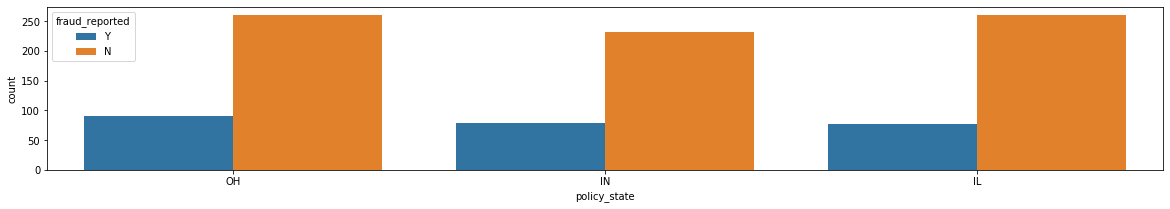

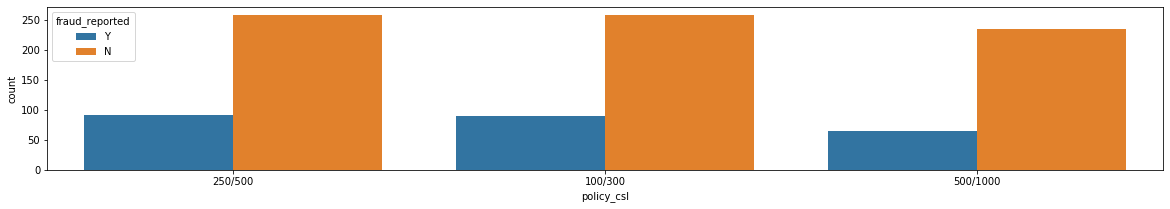

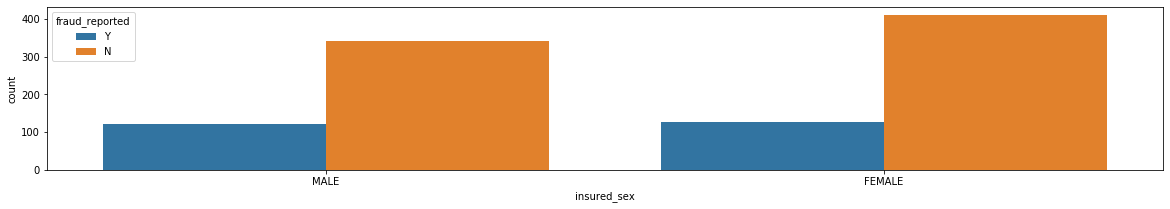

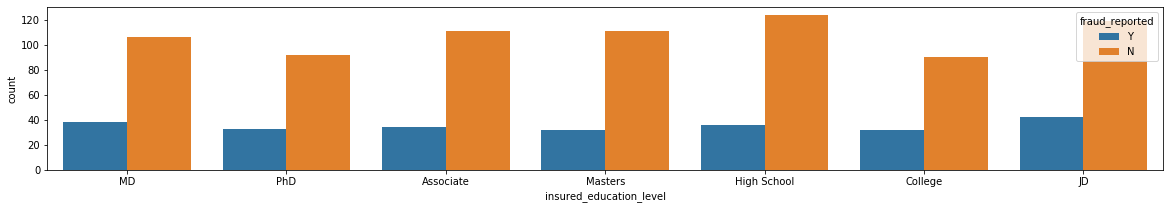

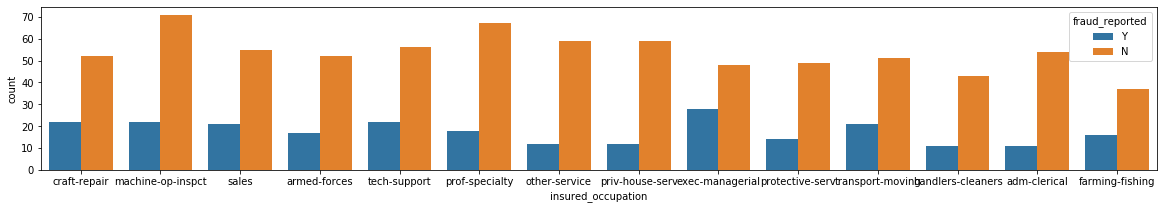

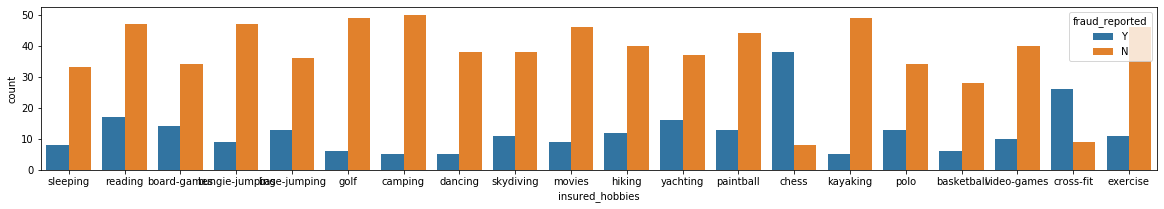

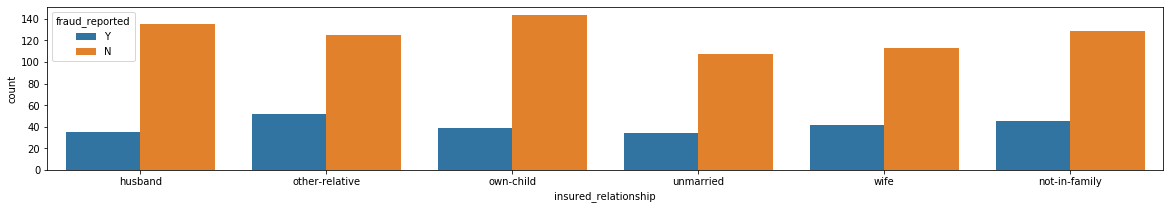

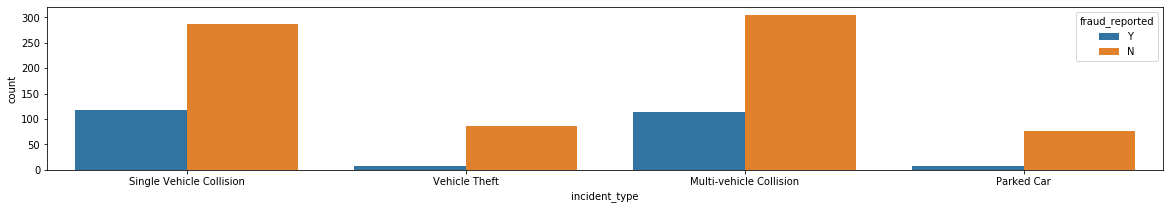

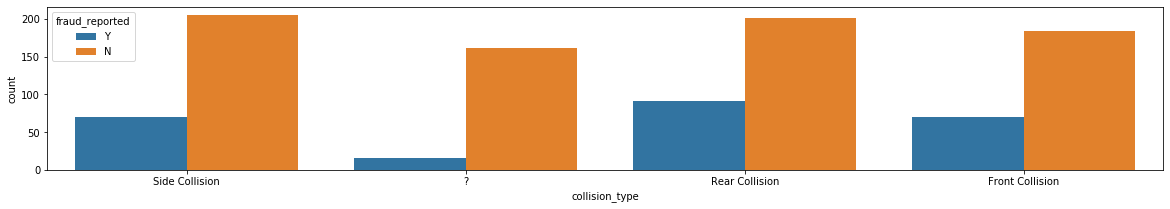

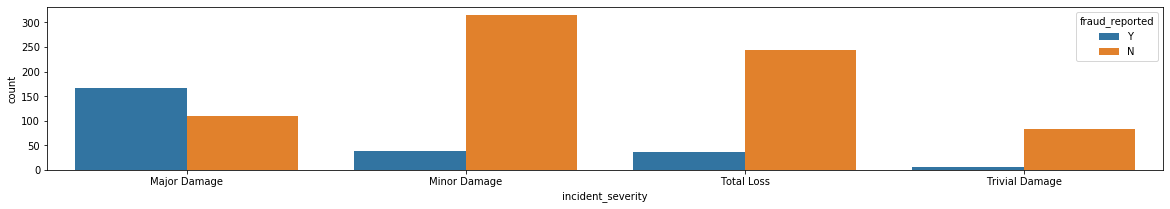

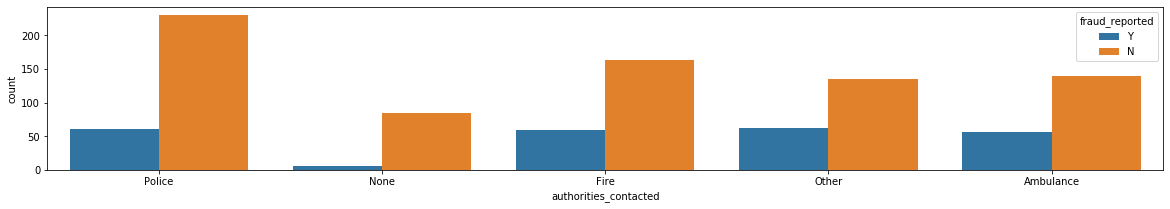

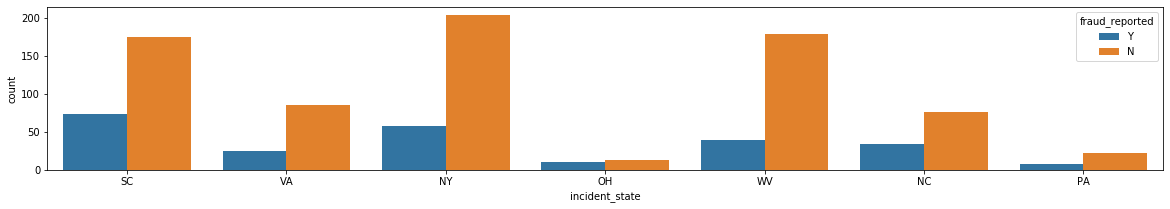

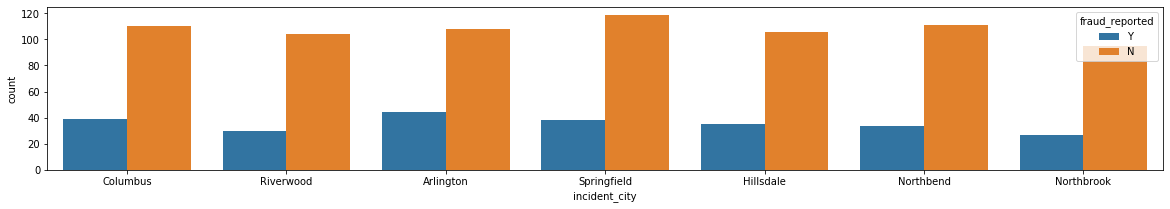

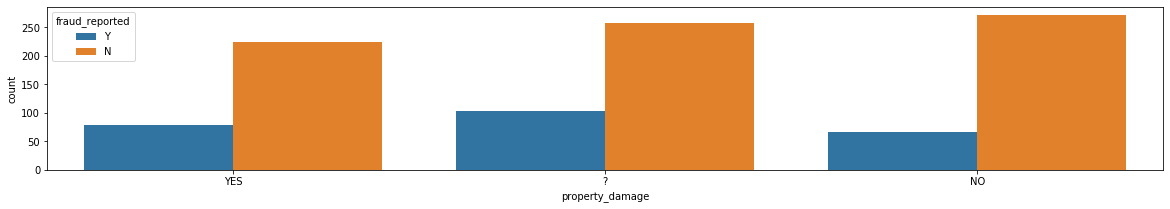

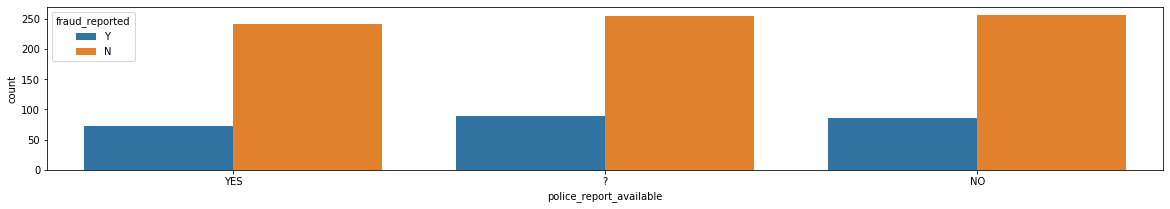

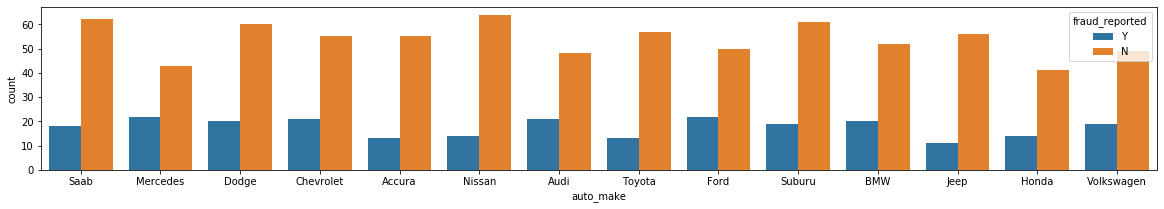

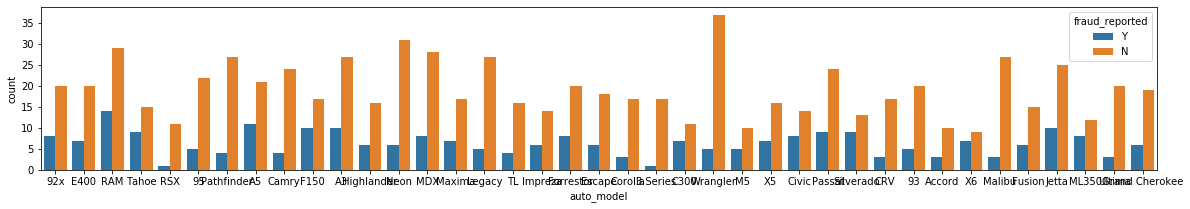

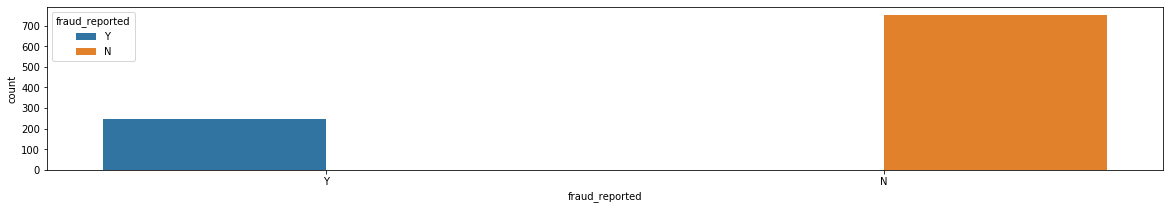

In [13]:
for i in object2.columns:
    plt.figure(figsize=(20,3))
    sns.countplot(df[i],hue=df["fraud_reported"])
    plt.show()

the above graph shows no of counts of other object data by relate with fraud_reported

it shows fraud insurance claims are less than perfect insurance claims

In [14]:
for i in object2.columns:
    print(i,object2[i].unique())

policy_state ['OH' 'IN' 'IL']
policy_csl ['250/500' '100/300' '500/1000']
insured_sex ['MALE' 'FEMALE']
insured_education_level ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_hobbies ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
insured_relationship ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type ['Side Collision' '?' 'Rear Collision' 'Front Collision']
incident_severity ['Major Damage' 'Mino

there is presence of some sign like ? so we have to remove it if required

In [15]:
df=df.replace("?",0)

In [16]:
object3=df.select_dtypes("object")
for i in object3:
    print(df[i].unique())

['OH' 'IN' 'IL']
['250/500' '100/300' '500/1000']
['MALE' 'FEMALE']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' 0 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
['Police' 'None' 'Fire' 'Other' 'Ambulance']
['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
['Columbus' 'Riverwood' 'Arlington' 'Sprin

convert object data to int data by encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object2.columns:
    df[i]=le.fit_transform(object2[i])

In [18]:
print(df.shape)
df.head()

(1000, 39)


,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,pb_year,incident_year,incident_month
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,6510,13020,52080,10,1,2004,1,2014,2015,1
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,780,780,3510,8,12,2007,1,2006,2015,1
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,7700,3850,23100,4,30,2007,0,2000,2015,2
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,6340,6340,50720,3,34,2014,1,1990,2015,10
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1300,650,4550,0,31,2009,0,2014,2015,2


In [19]:
df.describe()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,pb_year,incident_year,incident_month
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,203.954000,38.948000,546238.648000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000,2001.604000,2015.0,3.407000
std,115.113174,9.140287,257063.005276,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,7.360391,0.0,3.276291
min,0.000000,19.000000,100804.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000,1990.000000,2015.0,1.000000
25%,115.750000,32.000000,335980.250000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000,1995.000000,2015.0,1.000000
50%,199.500000,38.000000,533135.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000,2002.000000,2015.0,2.000000
75%,276.250000,44.000000,759099.750000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000,2008.000000,2015.0,5.000000
max,479.000000,64.000000,999435.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000,2015.000000,2015.0,12.000000


incident_year is haveing 0 std so it will not usefull for model prediction

In [20]:
df.drop(columns="incident_year",inplace=True)

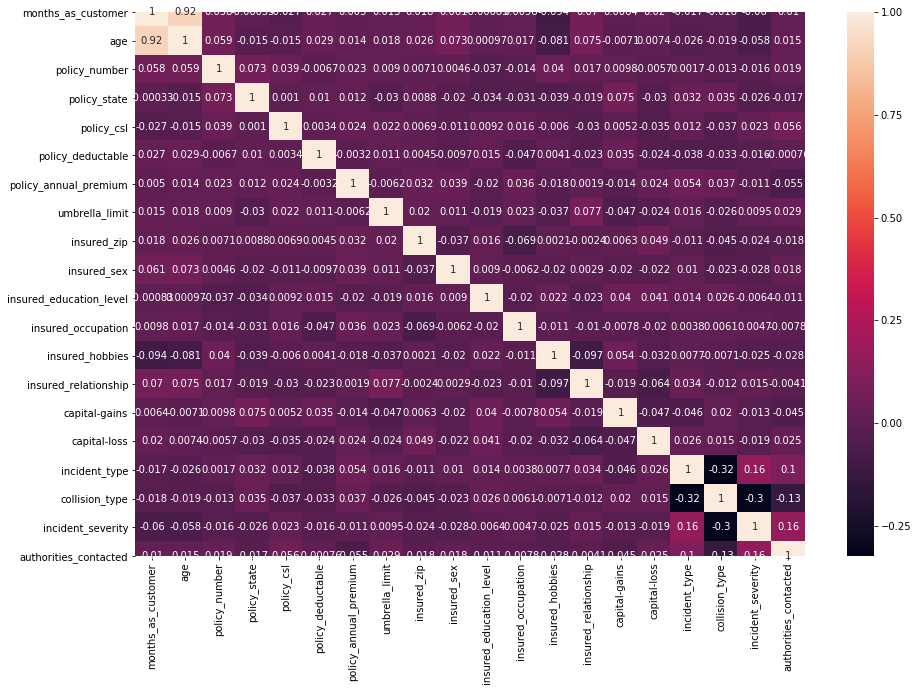

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:20,].corr(),annot=True)
plt.show()

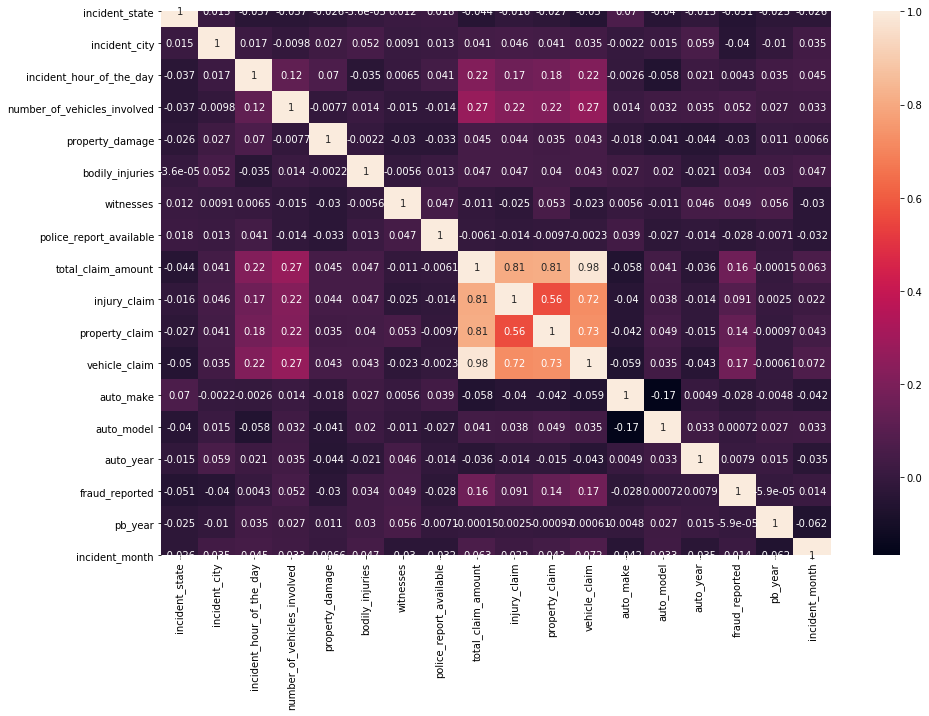

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,20:40,].corr(),annot=True)
plt.show()

In [23]:
df.corr()["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
incident_month                 0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
pb_year                       -0.000059
policy_annual_premium         -0.014480


incident_severity leads to high negative correlation with Fraud_reported

In [24]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418


split input and output columns separately to train and test the model

In [25]:
x=df.drop(columns="fraud_reported")
y=df["fraud_reported"]
print(x.shape)
print(y.shape)

(1000, 37)
(1000,)


In [26]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [27]:
def metrix(a,b):
    print("acc_score : ",accuracy_score(a,b))
    print("confusion_matrix : ",confusion_matrix(a,b))
    print("classification_report : ",classification_report(a,b))

In [28]:
def model(mod,x1,y1,x2,y2):
    mod.fit(x1,y1)
    pred=mod.predict(x2)
    metrix(y2,pred)

To split data as train and test

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=.20)

In [30]:
model1=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [31]:
for i in model1:
    print("Cross_val_score : ",cross_val_score(i,x,y,cv=5).mean())
    model(i,xtrain,ytrain,xtest,ytest)

Cross_val_score :  0.7480050501262532
acc_score :  0.725
confusion_matrix :  [[144   1]
 [ 54   1]]
classification_report :                precision    recall  f1-score   support

           0       0.73      0.99      0.84       145
           1       0.50      0.02      0.04        55

    accuracy                           0.73       200
   macro avg       0.61      0.51      0.44       200
weighted avg       0.66      0.72      0.62       200

Cross_val_score :  0.6770342008550214
acc_score :  0.65
confusion_matrix :  [[128  17]
 [ 53   2]]
classification_report :                precision    recall  f1-score   support

           0       0.71      0.88      0.79       145
           1       0.11      0.04      0.05        55

    accuracy                           0.65       200
   macro avg       0.41      0.46      0.42       200
weighted avg       0.54      0.65      0.58       200

Cross_val_score :  0.7790858021450536
acc_score :  0.725
confusion_matrix :  [[118  27]
 [ 28  27

Hyper Parameter Tuneing

In [32]:
para={'n_estimators':[100,200,300],'learning_rate':[0.001,0.01,.1,0.15,.2]}
gv=GridSearchCV(AdaBoostClassifier(),para,cv=5)
gv.fit(xtrain,ytrain)
pred=gv.predict(xtest)
accuracy_score(ytest,pred)

0.78

accuracy is increased by 1% because of tuneing

In [33]:
import joblib
joblib.dump(pred,"fraud_report.obj")

['fraud_report.obj']